In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('Lebron_James_data.csv',index_col=0)

In [12]:
data.columns

Index(['場次', '季賽場次', '比賽時間', '年紀', '所在隊伍', '主客場', '對手', '是否先發', '上場時間',
       '二分球命中數', '二分球投球數', '二分球命中率', '三分球命中數', '三分球投球數', '三分球命中率', '罰球命中數',
       '罰球投球數', '罰球命中率', '進攻籃板', '防守籃板', '全部籃板', '助攻', '抄截', '火鍋', '失誤', '犯規',
       '得分', 'Game Score(貢獻值)', '正負值', '勝分', '輸贏'],
      dtype='object')

In [11]:
data.isnull().sum().sort_values(ascending=False).head()

三分球命中率    40
罰球命中率     12
輸贏         0
季賽場次       0
比賽時間       0
dtype: int64

In [14]:
data[(data['三分球命中率'].isnull()) |data['罰球命中率'].isnull()][['三分球命中數','三分球投球數','三分球命中率','罰球命中數','罰球投球數','罰球命中率']].head(10)

,三分球命中數,三分球投球數,三分球命中率,罰球命中數,罰球投球數,罰球命中率
0,0,0,NaN,1,4,0.250
0,3,3,1.0,0,0,NaN
0,0,3,0.0,0,0,NaN
0,0,2,0.0,0,0,NaN
0,0,0,NaN,4,4,1.000
0,0,0,NaN,2,2,1.000
0,0,0,NaN,4,4,1.000
0,0,0,NaN,4,4,1.000
0,0,0,NaN,8,12,0.667
0,0,0,NaN,6,7,0.857


In [17]:
data[['三分球命中率','罰球命中率']]=data[['三分球命中率','罰球命中率']].fillna(value=0)

In [19]:
data.head()

,場次,季賽場次,比賽時間,年紀,所在隊伍,主客場,對手,是否先發,上場時間,二分球命中數,二分球投球數,二分球命中率,三分球命中數,三分球投球數,三分球命中率,罰球命中數,罰球投球數,罰球命中率,進攻籃板,防守籃板,全部籃板,助攻,抄截,火鍋,失誤,犯規,得分,Game Score(貢獻值),正負值,勝分,輸贏
0,1,1,2003-10-29,18-303,CLE,1,SAC,1,42:00,12,20,0.600,0,2,0.0,1,3,0.333,2,4,6,9,4,0,2,3,25,24.7,-9,-14,L
0,2,2,2003-10-30,18-304,CLE,1,PHO,1,41:00,8,17,0.471,1,5,0.2,4,7,0.571,2,10,12,8,1,0,7,1,21,14.7,-3,-9,L
0,3,3,2003-11-01,18-306,CLE,1,POR,1,39:00,3,12,0.250,0,1,0.0,2,2,1.000,0,4,4,6,2,0,2,3,8,5.0,-21,-19,L
0,4,4,2003-11-05,18-310,CLE,0,DEN,1,41:00,3,11,0.273,0,2,0.0,1,1,1.000,2,9,11,7,2,3,2,1,7,11.2,-3,-4,L
0,5,5,2003-11-07,18-312,CLE,1,IND,1,44:00,8,18,0.444,1,2,0.5,6,7,0.857,0,5,5,3,0,0,7,2,23,9.0,-7,-1,L


In [23]:
data_date=data.set_index(pd.to_datetime(data['比賽時間']))

In [33]:
data_date_first=data_date.copy()
data_date_first.index=data_date_first.index.to_period('M')

In [38]:
data_date_first.groupby(data_date_first.index)['得分'].sum()

比賽時間
2003-10     46
2003-11    252
2003-12    349
2004-01    232
2004-02    275
2004-03    333
2004-04    167
2004-11    368
2004-12    340
2005-01    318
2005-02    314
2005-03    448
2005-04    387
2005-11    397
2005-12    453
2006-01    492
2006-02    413
2006-03    460
2006-04    263
2006-11    413
2006-12    380
2007-01    376
2007-02    297
2007-03    455
2007-04    211
2007-10     10
2007-11    481
2007-12    258
2008-01    426
2008-02    423
          ... 
2014-03    441
2014-04    218
2014-10     53
2014-11    320
2014-12    358
2015-01    299
2015-02    244
2015-03    370
2015-04     99
2015-10     66
2015-11    370
2015-12    308
2016-01    377
2016-02    297
2016-03    358
2016-04    144
2016-10     63
2016-11    290
2016-12    390
2017-01    385
2017-02    259
2017-03    413
2017-04    154
2017-10    172
2017-11    444
2017-12    385
2018-01    329
2018-02    270
2018-03    495
2018-04    156
Freq: M, Name: 得分, Length: 100, dtype: int64

In [41]:
data_date_score=data_date['得分']

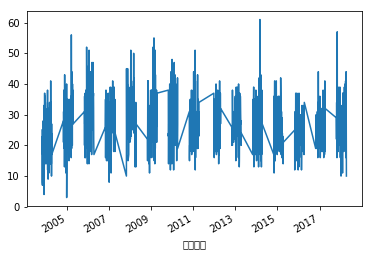

In [45]:
data_date_score.plot()

/Users/jacky/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


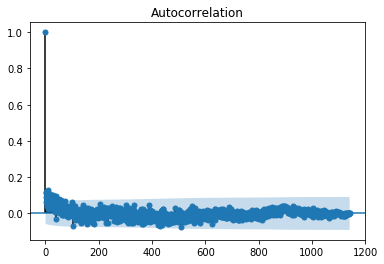

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_date_score).show()

In [49]:
#平穩性檢驗
#檢驗序列是否為平穩性檢驗
from statsmodels.tsa.stattools import adfuller as ADF
print(ADF(data_date_score))

(-5.594112337488045, 1.3088504402734825e-06, 16, 1126, {'1%': -3.4361708439503587, '5%': -2.86411024137968, '10%': -2.5681384677365924}, 7748.577781972534)


In [50]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(data_date_score,lags=1))

(array([4.68057783]), array([0.03050549]))


In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [59]:
pmax=int(5)
qmax=int(5)
bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data_date_score,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

/Users/jacky/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacky/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/jacky/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [66]:
bic_matrix=pd.DataFrame(bic_matrix)
print(bic_matrix.stack().idxmin())

(0, 1)


In [68]:
train=data_date_score[:'2014-07']
test=data_date_score['2014-07':]

In [95]:
model=ARIMA(data_date_score.values,(1,1,1)).fit()

In [96]:
data_date_score

比賽時間
2003-10-29    25
2003-10-30    21
2003-11-01     8
2003-11-05     7
2003-11-07    23
2003-11-08    17
2003-11-10    17
2003-11-12    18
2003-11-14    10
2003-11-15    22
2003-11-18    14
2003-11-19    28
2003-11-21    19
2003-11-22    15
2003-11-26    15
2003-11-28     6
2003-11-29    33
2003-12-02    19
2003-12-03     4
2003-12-06     8
2003-12-09    18
2003-12-11    23
2003-12-13    37
2003-12-15    27
2003-12-17    17
2003-12-19    36
2003-12-20    32
2003-12-23    22
2003-12-25    34
2003-12-26    18
              ..
2018-02-07    37
2018-02-09    22
2018-02-11    24
2018-02-13    37
2018-02-22    32
2018-02-23    18
2018-02-25    33
2018-02-27    31
2018-03-01    30
2018-03-03    25
2018-03-05    31
2018-03-07    39
2018-03-09    25
2018-03-11    24
2018-03-13    28
2018-03-15    35
2018-03-17    33
2018-03-19    40
2018-03-21    35
2018-03-23    27
2018-03-25    37
2018-03-27    18
2018-03-28    41
2018-03-30    27
2018-04-01    16
2018-04-03    27
2018-04-05    33
2018-04-0

In [97]:
len(test)

301

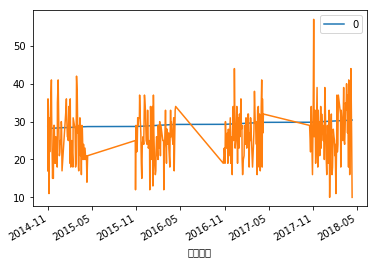

In [98]:
model_test=pd.DataFrame(model.forecast(301)[0],index=test.index)
model_test.plot()
test.plot()

In [84]:
model.forecast(301)[0]

array([31.06236131, 27.65044698, 28.2462012 , 27.68754001, 26.40987853,
       27.45469711, 27.61747169, 27.18299   , 28.39858736, 28.25158642,
       28.53499889, 28.68009045, 28.64217153, 28.76842861, 28.72480889,
       28.59139833, 28.65191514, 28.53323855, 28.51298894, 28.50600648,
       28.48964154, 28.50890055, 28.52350749, 28.53592778, 28.57447649,
       28.58779653, 28.61184531, 28.63179484, 28.64454777, 28.65802259,
       28.66832871, 28.67625384, 28.68651137, 28.69357875, 28.70287921,
       28.71249701, 28.72220485, 28.73302604, 28.74417195, 28.75543304,
       28.76723089, 28.77866869, 28.79030505, 28.80177909, 28.81305393,
       28.82427842, 28.83537715, 28.84637271, 28.8573781 , 28.86831818,
       28.87929707, 28.89028682, 28.90129468, 28.91233931, 28.92340342,
       28.93448078, 28.94557614, 28.9566695 , 28.96776697, 28.97885992,
       28.98994699, 29.00102989, 29.01210727, 29.02318023, 29.03425158,
       29.04532066, 29.05639002, 29.06745972, 29.07853027, 29.08

In [86]:
from pyramid.arima import auto_arima

In [123]:
season_model=auto_arima(data_date_score,start_p=1,max_p=5,max_q=3,m=12,start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

AttributeError: module 'pyramid' has no attribute '__version__'

In [132]:
import fbprophet

In [158]:
data_date_score_new=data_date_score.resample('M').sum().reset_index()
data_date_score_new

,比賽時間,得分
0,2003-10-31,46
1,2003-11-30,252
2,2003-12-31,349
3,2004-01-31,232
4,2004-02-29,275
5,2004-03-31,333
6,2004-04-30,167
7,2004-05-31,0
8,2004-06-30,0
9,2004-07-31,0


In [159]:
gm = data_date_score_new.rename(columns={'比賽時間':'ds','得分':'y'})

In [160]:
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gm_prophet.fit(gm)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [194]:
gm_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-10-31,168.993667,-18.207154,120.250784,168.993667,168.993667,-115.430399,-115.430399,-115.430399,-115.430399,-115.430399,-115.430399,0.0,0.0,0.0,53.563268
1,2003-11-30,169.565249,256.840855,395.869693,169.565249,169.565249,151.259467,151.259467,151.259467,151.259467,151.259467,151.259467,0.0,0.0,0.0,320.824715
2,2003-12-31,170.155883,246.690426,382.412638,170.155883,170.155883,146.906493,146.906493,146.906493,146.906493,146.906493,146.906493,0.0,0.0,0.0,317.062376
3,2004-01-31,170.746518,322.801831,461.331478,170.746518,170.746518,220.763720,220.763720,220.763720,220.763720,220.763720,220.763720,0.0,0.0,0.0,391.510238
4,2004-02-29,171.299048,246.194763,378.140424,171.299048,171.299048,140.220713,140.220713,140.220713,140.220713,140.220713,140.220713,0.0,0.0,0.0,311.519761
5,2004-03-31,171.889682,328.322358,460.430156,171.889682,171.889682,222.812008,222.812008,222.812008,222.812008,222.812008,222.812008,0.0,0.0,0.0,394.701690
6,2004-04-30,172.461264,153.294240,284.737572,172.461264,172.461264,42.483058,42.483058,42.483058,42.483058,42.483058,42.483058,0.0,0.0,0.0,214.944322
7,2004-05-31,173.051899,-66.120852,64.720608,173.051899,173.051899,-175.097789,-175.097789,-175.097789,-175.097789,-175.097789,-175.097789,0.0,0.0,0.0,-2.045890
8,2004-06-30,173.623481,-67.756772,72.093029,173.623481,173.623481,-174.501512,-174.501512,-174.501512,-174.501512,-174.501512,-174.501512,0.0,0.0,0.0,-0.878030
9,2004-07-31,174.214116,-71.569709,59.322227,174.214116,174.214116,-175.921268,-175.921268,-175.921268,-175.921268,-175.921268,-175.921268,0.0,0.0,0.0,-1.707152


In [182]:
future=gm_prophet.make_future_dataframe(periods=20,freq='M')
future=gm_prophet.predict(gm_forecast)

In [195]:
future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-10-31,168.993667,-15.415080,118.960470,168.993667,168.993667,-115.430399,-115.430399,-115.430399,-115.430399,-115.430399,-115.430399,0.0,0.0,0.0,53.563268
1,2003-11-30,169.565249,257.076493,388.278505,169.565249,169.565249,151.259467,151.259467,151.259467,151.259467,151.259467,151.259467,0.0,0.0,0.0,320.824715
2,2003-12-31,170.155883,253.006163,383.483265,170.155883,170.155883,146.906493,146.906493,146.906493,146.906493,146.906493,146.906493,0.0,0.0,0.0,317.062376
3,2004-01-31,170.746518,325.503987,460.866177,170.746518,170.746518,220.763720,220.763720,220.763720,220.763720,220.763720,220.763720,0.0,0.0,0.0,391.510238
4,2004-02-29,171.299048,244.372448,383.788690,171.299048,171.299048,140.220713,140.220713,140.220713,140.220713,140.220713,140.220713,0.0,0.0,0.0,311.519761
5,2004-03-31,171.889682,325.202978,463.269068,171.889682,171.889682,222.812008,222.812008,222.812008,222.812008,222.812008,222.812008,0.0,0.0,0.0,394.701690
6,2004-04-30,172.461264,143.417642,277.525944,172.461264,172.461264,42.483058,42.483058,42.483058,42.483058,42.483058,42.483058,0.0,0.0,0.0,214.944322
7,2004-05-31,173.051899,-71.470259,68.411482,173.051899,173.051899,-175.097789,-175.097789,-175.097789,-175.097789,-175.097789,-175.097789,0.0,0.0,0.0,-2.045890
8,2004-06-30,173.623481,-68.707964,67.662476,173.623481,173.623481,-174.501512,-174.501512,-174.501512,-174.501512,-174.501512,-174.501512,0.0,0.0,0.0,-0.878030
9,2004-07-31,174.214116,-68.251743,63.964552,174.214116,174.214116,-175.921268,-175.921268,-175.921268,-175.921268,-175.921268,-175.921268,0.0,0.0,0.0,-1.707152


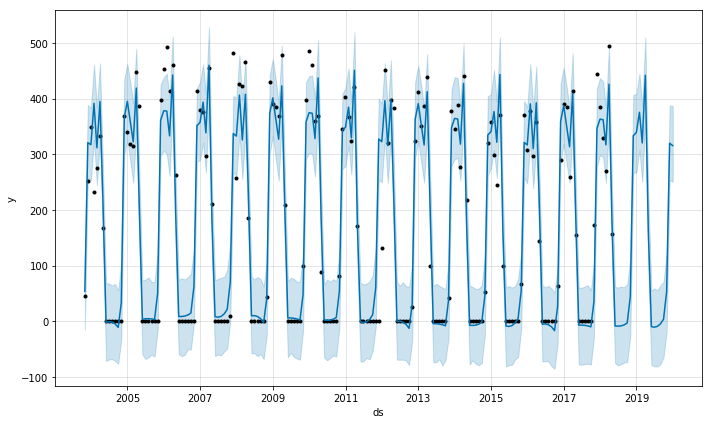

<Figure size 864x576 with 0 Axes>

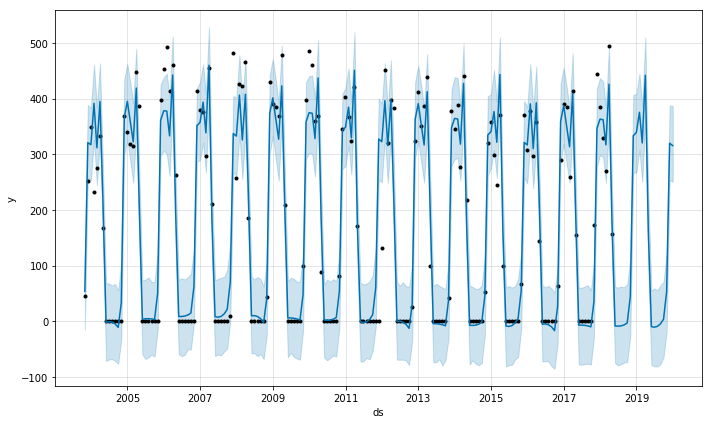

In [183]:
plt.figure(figsize=(12,8))
gm_prophet.plot(future)
plt.plot(test)

In [174]:
gm_prophet.changepoints[:10]

6    2004-04-30
11   2004-09-30
17   2005-03-31
22   2005-08-31
28   2006-02-28
33   2006-07-31
39   2007-01-31
44   2007-06-30
50   2007-12-31
56   2008-06-30
Name: ds, dtype: datetime64[ns]

In [175]:
gm_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [176]:
for changepoint in [0.001,0.05,0.1,0.5]:
    model=fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
    model.fit(gm)
    
    future=model.make_future_dataframe(periods=24,freq='M')
    future=model.predict(future)
    
    gm[changepoint]=future['yhat']

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


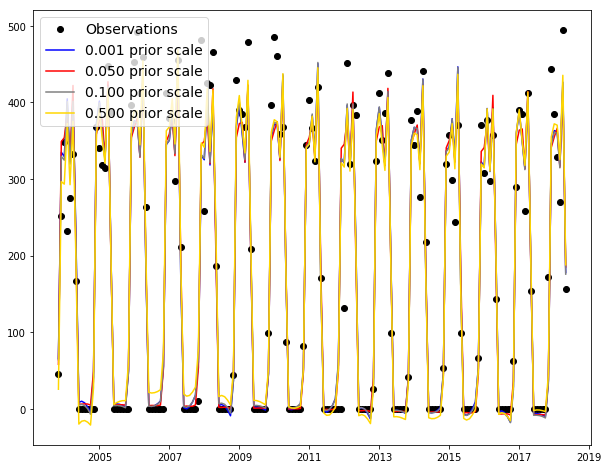

In [181]:
plt.figure(figsize=(10,8))
plt.plot(gm['ds'],gm['y'],'ko',label='Observations')
colors={0.001:'b',0.05:'r',0.1:'grey',0.5:'gold'}
for changepoint in [0.001,0.05,0.1,0.5]:
    plt.plot(gm['ds'],gm[changepoint],color=colors[changepoint],label='%.3f prior scale' %changepoint)
plt.legend(prop={'size':14},loc='upper left')

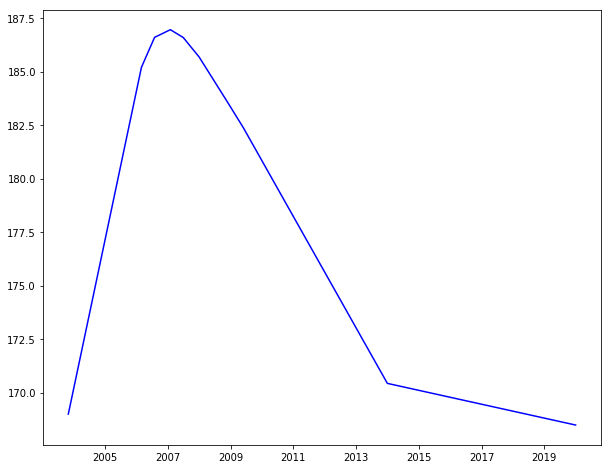

In [185]:
plt.figure(figsize=(10,8))
plt.plot(future['ds'],future['trend'],'b-')

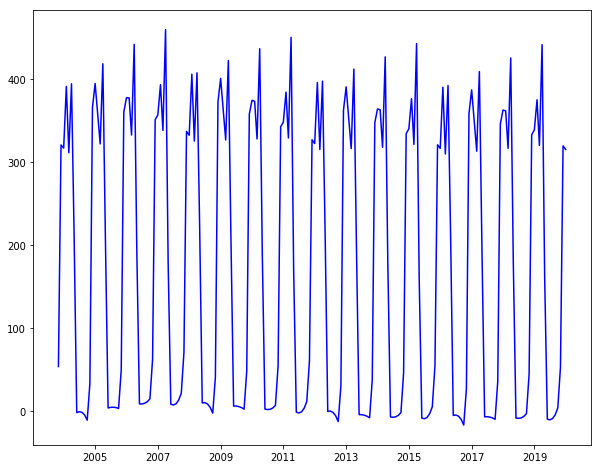

In [186]:
plt.figure(figsize=(10,8))
plt.plot(future['ds'],future['yhat'],'b-')

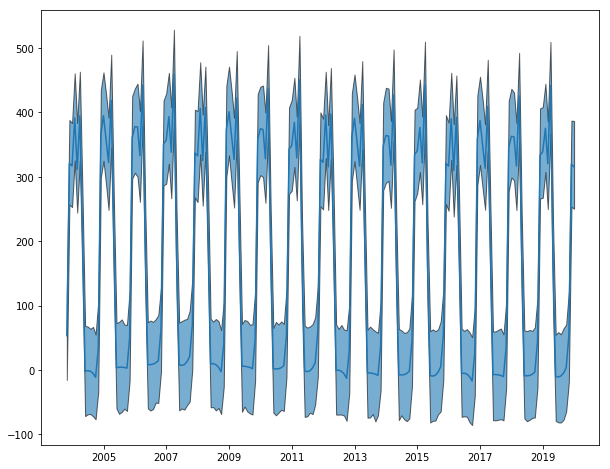

In [191]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(future['ds'],future['yhat'])

#plot uncertainty values
ax.fill_between(future['ds'].dt.to_pydatetime(),future['yhat_upper'],future['yhat_lower'],alpha=0.6,edgecolor='k')


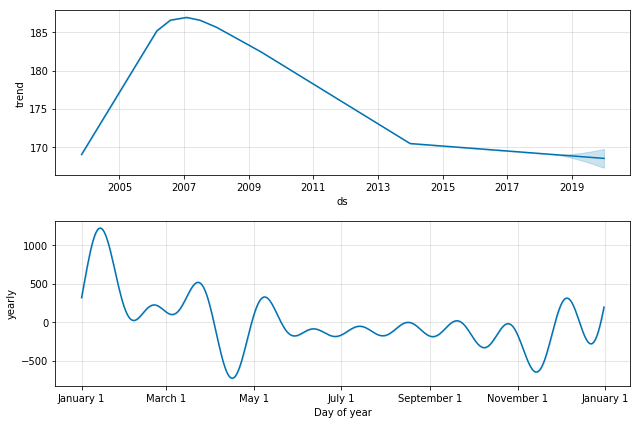

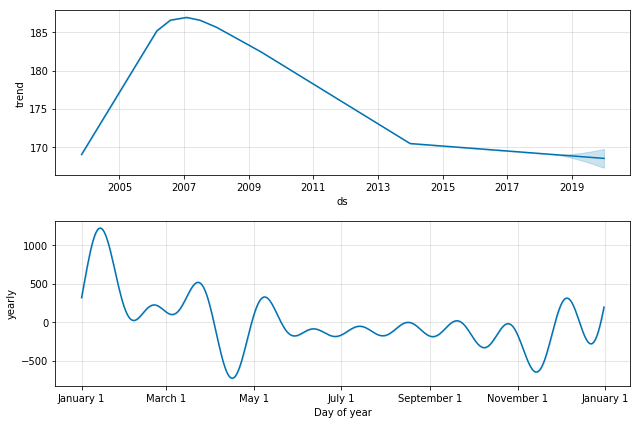

In [192]:
gm_prophet.plot_components(gm_forecast)

In [184]:
future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-10-31,168.993667,-15.415080,118.960470,168.993667,168.993667,-115.430399,-115.430399,-115.430399,-115.430399,-115.430399,-115.430399,0.0,0.0,0.0,53.563268
1,2003-11-30,169.565249,257.076493,388.278505,169.565249,169.565249,151.259467,151.259467,151.259467,151.259467,151.259467,151.259467,0.0,0.0,0.0,320.824715
2,2003-12-31,170.155883,253.006163,383.483265,170.155883,170.155883,146.906493,146.906493,146.906493,146.906493,146.906493,146.906493,0.0,0.0,0.0,317.062376
3,2004-01-31,170.746518,325.503987,460.866177,170.746518,170.746518,220.763720,220.763720,220.763720,220.763720,220.763720,220.763720,0.0,0.0,0.0,391.510238
4,2004-02-29,171.299048,244.372448,383.788690,171.299048,171.299048,140.220713,140.220713,140.220713,140.220713,140.220713,140.220713,0.0,0.0,0.0,311.519761
5,2004-03-31,171.889682,325.202978,463.269068,171.889682,171.889682,222.812008,222.812008,222.812008,222.812008,222.812008,222.812008,0.0,0.0,0.0,394.701690
6,2004-04-30,172.461264,143.417642,277.525944,172.461264,172.461264,42.483058,42.483058,42.483058,42.483058,42.483058,42.483058,0.0,0.0,0.0,214.944322
7,2004-05-31,173.051899,-71.470259,68.411482,173.051899,173.051899,-175.097789,-175.097789,-175.097789,-175.097789,-175.097789,-175.097789,0.0,0.0,0.0,-2.045890
8,2004-06-30,173.623481,-68.707964,67.662476,173.623481,173.623481,-174.501512,-174.501512,-174.501512,-174.501512,-174.501512,-174.501512,0.0,0.0,0.0,-0.878030
9,2004-07-31,174.214116,-68.251743,63.964552,174.214116,174.214116,-175.921268,-175.921268,-175.921268,-175.921268,-175.921268,-175.921268,0.0,0.0,0.0,-1.707152


比賽時間
2003-10-29    25
2003-10-30    21
2003-11-01     8
2003-11-05     7
2003-11-07    23
2003-11-08    17
2003-11-10    17
2003-11-12    18
2003-11-14    10
2003-11-15    22
2003-11-18    14
2003-11-19    28
2003-11-21    19
2003-11-22    15
2003-11-26    15
2003-11-28     6
2003-11-29    33
2003-12-02    19
2003-12-03     4
2003-12-06     8
2003-12-09    18
2003-12-11    23
2003-12-13    37
2003-12-15    27
2003-12-17    17
2003-12-19    36
2003-12-20    32
2003-12-23    22
2003-12-25    34
2003-12-26    18
              ..
2018-02-07    37
2018-02-09    22
2018-02-11    24
2018-02-13    37
2018-02-22    32
2018-02-23    18
2018-02-25    33
2018-02-27    31
2018-03-01    30
2018-03-03    25
2018-03-05    31
2018-03-07    39
2018-03-09    25
2018-03-11    24
2018-03-13    28
2018-03-15    35
2018-03-17    33
2018-03-19    40
2018-03-21    35
2018-03-23    27
2018-03-25    37
2018-03-27    18
2018-03-28    41
2018-03-30    27
2018-04-01    16
2018-04-03    27
2018-04-05    33
2018-04-0